He hecho dos chromas
Tenemos uno que necesita un fondo verde/rojo/azul y otro donde no es necesario.

In [1]:
# Funciones auxiliares
import numpy             as np
import cv2               as cv
import skimage           as si
import matplotlib.pyplot as plt
import ipywidgets
from matplotlib.pyplot import imshow, subplot, title

%matplotlib inline

def fig(w,h):
    return plt.figure(figsize=(w,h))

def read_img(file):
    img = cv.imread(file)
    return img,cv.cvtColor(img , cv.COLOR_BGR2RGB) 

def rgb2yuv(x):
    return cv.cvtColor(x,cv.COLOR_RGB2YUV)

Chroma sin fondo.
En vez de usar las mismas funciones de `chroma.ipynb` he preferido probar con otras
de opencv.

Cargamos el fondo y el objeto

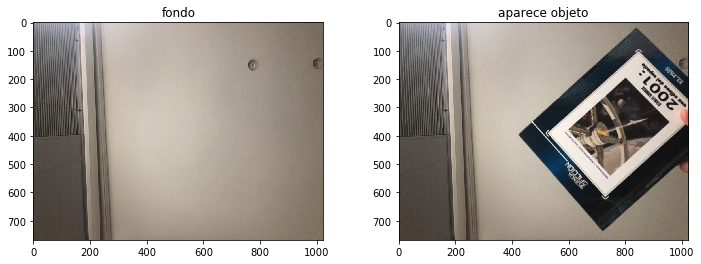

In [2]:
back_bgr,back_rgb = read_img("../img/CHROMA/fondo.png")
obj_bgr,obj_rgb  = read_img("../img/CHROMA/object.png")
fig(12,4)
subplot(1,2,1); imshow(back_rgb); title('fondo');
subplot(1,2,2); imshow(obj_rgb); title('aparece objeto');

Calculamos la mascara

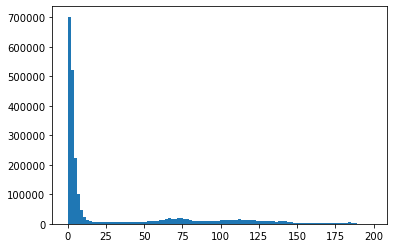

In [3]:
dbf = cv.absdiff(back_bgr, obj_bgr)
plt.hist(dbf.flatten(), 100);

In [1]:
# Elegimos t_value meciante un trackbar
def fun(t_value):
    thresh= cv.threshold(dbf, t_value, 255, cv.THRESH_BINARY)[1]

    # Tambien creamos la mascara
    # Creamos la mascara Pasamos de 255 -> True 0->False
    mask = thresh.astype(bool)
     # el paisaje ficticio donde queremos insertar el personaje
    dst = cv.imread("../img/CHROMA/good.jfif")
    # nos aseguramos de que tenga el mismo tamaño que las imágenes anteriores
    r, c, _ = mask.shape
    result = cv.resize(dst, (c, r))
    # Y ya podemos copiar la imagen
    np.copyto(result, obj_bgr, where=mask)
    fig(12,4)
    subplot(1,2,1); imshow(cv.cvtColor(thresh , cv.COLOR_BGR2GRAY),'gray' ); title('mascara');
    subplot(1,2,2); imshow(cv.cvtColor(result , cv.COLOR_BGR2RGB)); title('Resultado');
    
ipywidgets.interactive(fun, t_value=(0,255))    


NameError: name 'ipywidgets' is not defined